## Initial imports

In [1]:
from scm.plams import *
from scm.plams.interfaces.adfsuite.ase_calculator import AMSCalculator
from ase.optimize import BFGS
from ase.build import molecule as ase_build_molecule
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt

# In this example AMS runs in AMSWorker mode, so we have no use for the PLAMS working directory
# Let's delete it after the calculations are done
config.erase_workdir = True

# this line is not required in AMS2025+
init()

PLAMS working folder: /path/plams/examples/ASECalculator/plams_workdir


## Construct an initial system
Here, we use the ``molecule()`` from ``ase.build`` to construct an ASE Atoms object.

You could also convert a PLAMS Molecule to the ASE format using ``toASE()``.

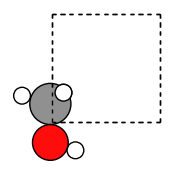

In [2]:
atoms = ase_build_molecule("CH3OH")
# alternatively:
# atoms = toASE(from_smiles('CO'))

atoms.set_pbc((True, True, True))  # 3D periodic
atoms.set_cell([4.0, 4.0, 4.0])  # cubic box

# plot the atoms
plt.figure(figsize=(2, 2))
plt.axis("off")
plot_atoms(atoms, scale=0.5);

## Set the AMS settings

First, set the AMS settings as you normally would do:

In [3]:
s = Settings()
s.input.ams.Task = "SinglePoint"  # the geometry optimization is handled by ASE
s.input.ams.Properties.Gradients = "Yes"  # ensures the forces are returned
s.input.ams.Properties.StressTensor = "Yes"  # ensures the stress tensor is returned

# Engine definition, could also be used to set up ADF, ReaxFF, ...
s.input.ForceField.Type = "UFF"

# run in serial
s.runscript.nproc = 1

## Run the ASE optimizer

In [4]:
print("Initial coordinates:")
print(atoms.get_positions())

with AMSCalculator(settings=s, amsworker=True) as calc:
    atoms.calc = calc
    optimizer = BFGS(atoms)
    optimizer.run(fmax=0.27)  # optimize until forces are smaller than 0.27 eV/ang

print(f"Optimized energy (eV): {atoms.get_potential_energy()}")
print("Optimized coordinates:")
print(atoms.get_positions())

Initial coordinates:
[[-0.047131  0.664389  0.      ]
 [-0.047131 -0.758551  0.      ]
 [-1.092995  0.969785  0.      ]
 [ 0.878534 -1.048458  0.      ]
 [ 0.437145  1.080376  0.891772]
 [ 0.437145  1.080376 -0.891772]]
      Step     Time          Energy         fmax
BFGS:    0 14:38:52        0.424475        3.0437
BFGS:    1 14:38:52        0.354817        2.8239
BFGS:    2 14:38:52        0.270256        0.9678
BFGS:    3 14:38:52        0.223897        0.6128
BFGS:    4 14:38:52        0.200223        0.5503
BFGS:    5 14:38:52        0.196200        0.1861
Optimized energy (eV): 0.19620006656661274
Optimized coordinates:
[[-7.36222829e-02  6.46660224e-01 -3.68476800e-17]
 [-4.27710560e-02 -7.22615924e-01  2.05712990e-18]
 [-1.12651815e+00  9.85598502e-01 -1.78482333e-18]
 [ 9.22587449e-01 -9.45309675e-01  1.18153964e-17]
 [ 4.42945518e-01  1.01179194e+00  9.09790370e-01]
 [ 4.42945518e-01  1.01179194e+00 -9.09790370e-01]]
